In [ ]:
/content/sample_data/complete.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [ ]:
# dataset load
data = pd.read_csv("/content/sample_data/complete.csv")
data_only_pm25 = pd.DataFrame(data.loc[:, ["PM-2.5", "일시"]])
data_only_pm25["일시"] = pd.to_datetime(data_only_pm25["일시"])
data_only_pm25.index = data_only_pm25["일시"]
del data_only_pm25["일시"]
data_only_pm25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2029 entries, 2018-02-01 to 2023-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM-2.5  2029 non-null   float64
dtypes: float64(1)
memory usage: 31.7 KB


In [ ]:
data = data_only_pm25[data_only_pm25.index > "2019-11-01"]

<Figure size 640x480 with 0 Axes>

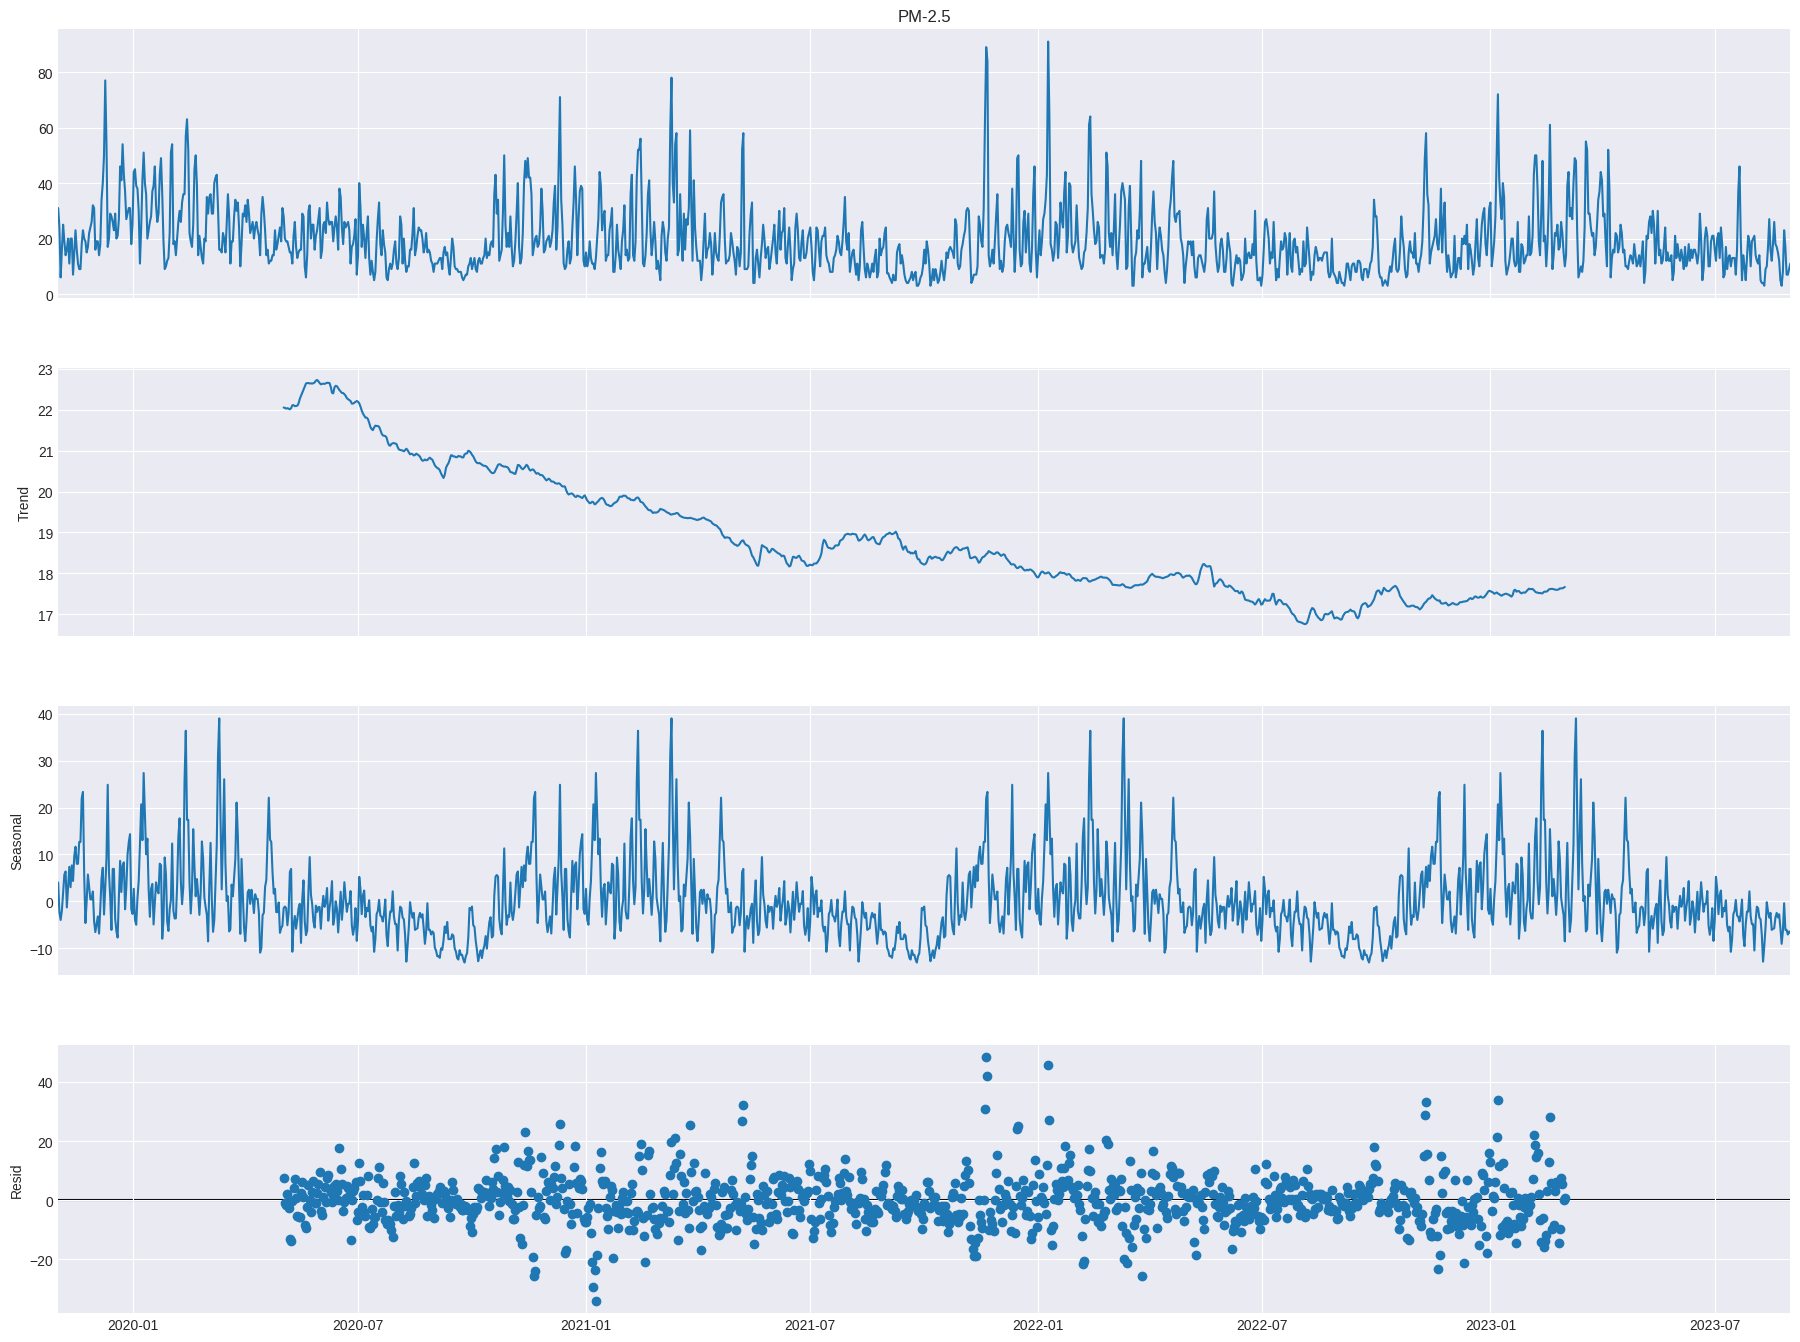

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["PM-2.5"], model="additive", period=365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


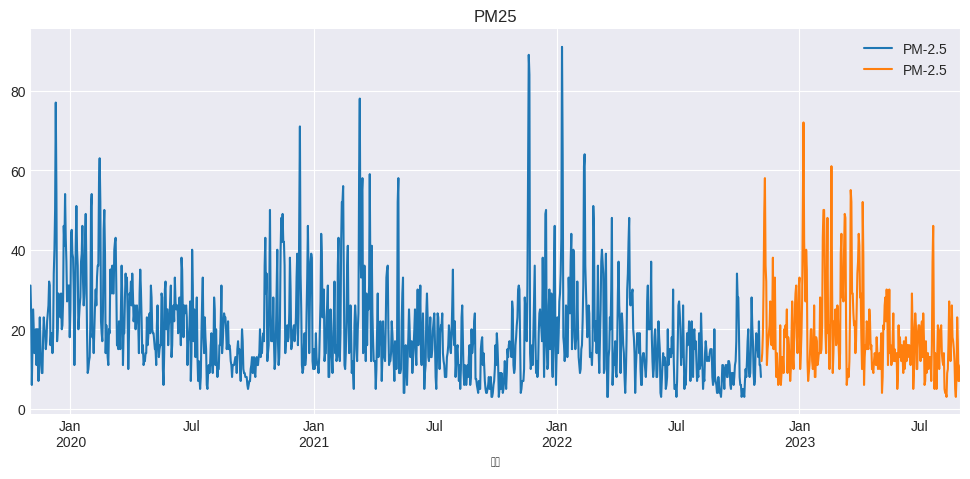

In [ ]:
tst_size = 300
trn, tst = data[:-tst_size], data[-tst_size:]

ax = trn.plot(title="PM25", label='trn', figsize=(12,5))
ax = tst.plot(label='tst', ax=ax)

plt.legend()
plt.show()

ADF Statistic: -4.113674270066765
p-value: 0.0009193278668355996
Critical Values:
	1%: -3.436402509014354
	5%: -2.8642124318084456
	10%: -2.568192893555997


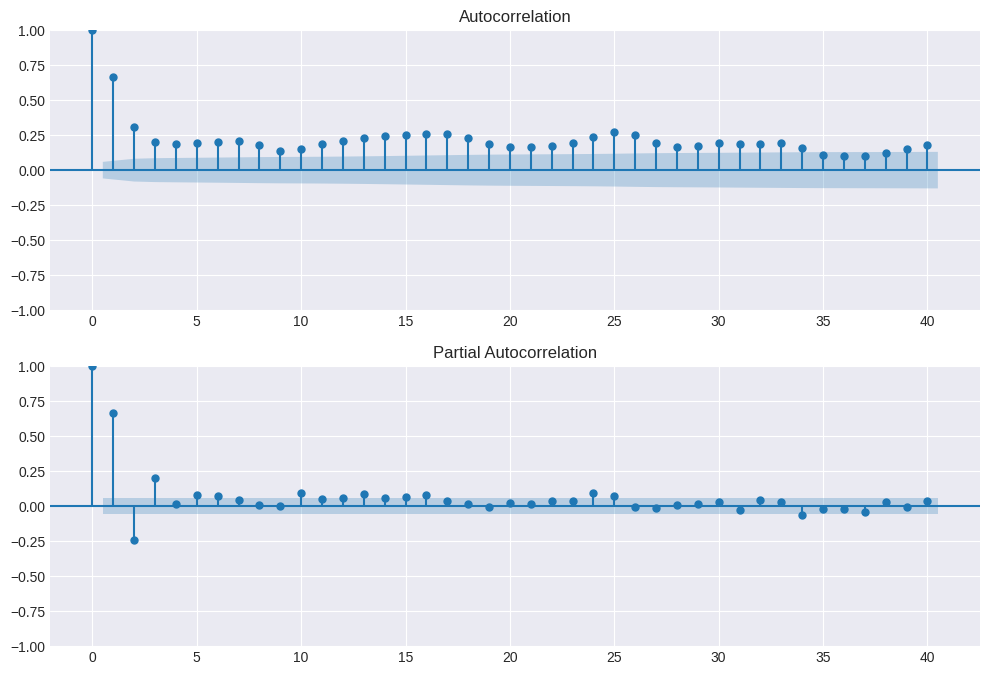

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(trn.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(trn.values.squeeze(), lags=40, ax=ax2)

adf = adfuller(trn)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

ADF Statistic: -6.54779188485268
p-value: 9.0079379859379e-09
Critical Values:
	1%: -3.436834649927693
	5%: -2.864403033735098
	10%: -2.568294409927983


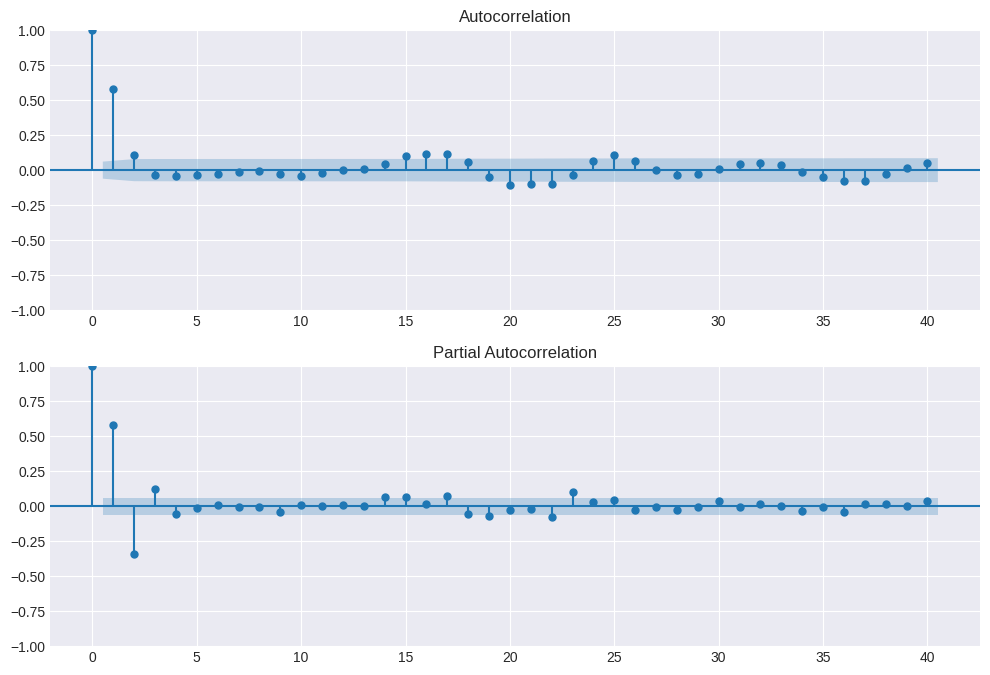

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
data_diff = data.diff(365).dropna()
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data_diff.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data_diff.squeeze(), lags=40, ax=ax2)

adf = adfuller(data_diff)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

In [ ]:
def mape(y_pred, y_true):
  return (np.abs(y_pred - y_true)/y_true).mean() * 100

def mae(y_pred, y_true):
  return np.abs(y_pred - y_true).mean()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

trn, tst = data[:-tst_size]["PM-2.5"], data[-tst_size:]["PM-2.5"]


In [ ]:
trn.shape

(999,)

In [ ]:
model = ARIMA(trn, order=(1,0,1), seasonal_order=(0, 1, 0, 365)) # AR(9)
model = model.fit(method='innovations_mle', low_memory=True, cov_type='none')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-18-d93f9e30f75f>:2: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  model = model.fit(method='innovations_mle', low_memory=True, cov_type='none')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


2023-02-13    36.0
2023-02-14    30.0
2023-02-15    23.0
2023-02-16    18.0
2023-02-17    19.0
              ... 
2023-08-27    14.0
2023-08-28    16.0
2023-08-29    17.0
2023-08-30    22.0
2023-08-31    24.0
Freq: D, Name: predicted_mean, Length: 200, dtype: float64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


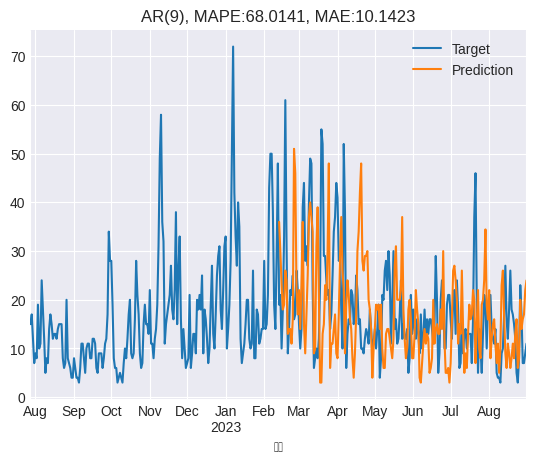

In [20]:
res_dict = {}
from datetime import datetime
start_date = datetime(2023,2,13)
end_date = datetime(2023,8,31)
# start_date = pd.Timestamp("2023-02-13")
# end_date = pd.Timestamp("2023-08-31")

prd = model.predict(start_date, end_date, dynamic=True)
print(prd)
plt.title(f"AR(9), MAPE:{mape(prd, tst):.4f}, MAE:{mae(prd, tst):.4f}")
tst.plot(label="Target")
prd.plot(label=f"Prediction")
plt.legend()
plt.show()

res_dict.update({'AR(9)': {'MAPE':mape(prd,tst), 'MAE':mae(prd,tst)}})